# Example 03-06

$$ \min Z= -x_1  +2x_2  $$

\begin{align}
 -x_1 + 3x_2 &\leq 10\\
      x_1 + x_2 &\leq 6\\
      x_1 - x_2 &\leq 2\\
    x_1, x_2 &\geq 0
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Domain function
x = np.linspace(0, 20, 40)

# constraints
eq1 = (10 + x) / 3   # x2 <= (10 + x1)
eq2 =   6 - x        # x2 <=   6 - x1
eq3 =   x - 2        # x2 >=  x1 -  2  

# z function
zeq = lambda x1, z: (z + x1) / 2

# equations_list  x, f(x)
equations_list = [(x, eq1),  # 
                  (x, eq2),
                  (x, eq3),
                  ]
# equations_label
equations_label = [r"$-x_1 + 3x_2 \leq 10$",
                   r"$x_1 + x_2 \leq 6$",
                   r"$x_1 - x_2 \leq 2$",
                   ]

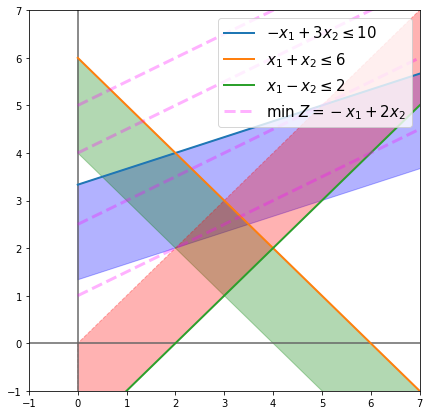

In [3]:
# ==================== First Plot====================
plt.figure(figsize=(7,7))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# plot equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)
# plot z function
plt.plot(x, zeq(x, 10), lw=3, ls="--", color="magenta", alpha=0.3, label=r"$\min\; Z = -x_1  +2x_2 $")
for i in np.linspace(8, 2, 3):
    plt.plot(x, zeq(x, i), lw=3, ls="--", color="magenta", alpha=0.3)
# plot areas
# plt.fill_between(x, zeq(x, 10), zeq(x, 10) - 1, facecolor="magenta", alpha=0.2)
plt.fill_between(x, eq1, eq1 - 2, color="b", alpha=0.3)
plt.fill_between(x, eq2, eq2 - 2, color="g", alpha=0.3)
plt.fill_between(x, eq3, eq3 + 2, color="r", alpha=0.3, ls="--")
# plot limits
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.legend(fontsize=15, loc="upper right")
plt.show()

In [4]:
# Coefficient Matrix
A = np.array([
    [-1,  3],  # blue   0
    [ 1,  1],  # orange 1
    [ 1, -1],  # green  2
    [ 0,  1],  # xAxis  3
    [ 1,  0],  # yAxis  4
    ])

# right-hand vectors
b = np.array([10,  # b1
               6,  # b2
               2,  # b3
               0,  # xAxis
               0,  # yAxis
               ])
# intersecting lines
intersecting_lines = [(3, 4),  # xAxis  ,  yAxis
                      (2, 3),  # green  ,  xAxis
                      (1, 2),  # orange ,  green
                      (0, 1),  # blue   ,  orange
                      (0, 4),  # blue   ,  yAxis
                      ]

In [5]:
points = [np.linalg.solve(A[[*i]], b[[*i]]) for i in intersecting_lines]
coordinates = [*zip(*points)]
best_index, best_value = min(enumerate(point.dot(np.array([-1, 2])) for point in points), key=lambda t:t[1])
best_point = points[best_index]

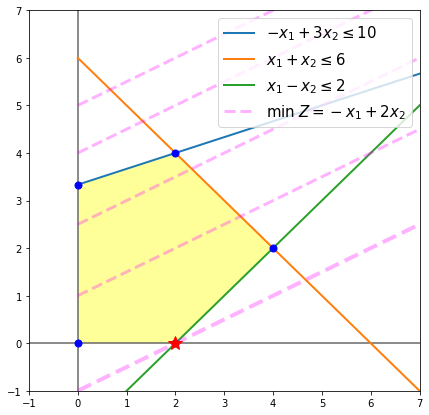

In [6]:
# ==================== Second Plot====================
plt.figure(figsize=(7,7))
plt.axvline(0, color="0.4")
plt.axhline(0, color="0.4")
# plot equations
for eq, eqlabel in zip(equations_list, equations_label):
    plt.plot(*eq, lw=2, label=eqlabel)
# plot z function
plt.plot(x, zeq(x, 10), lw=3, ls="--", color="magenta", alpha=0.3, label=r"$\min\; Z = -x_1  +2x_2 $")
for i in np.linspace(8, 2, 3):
    plt.plot(x, zeq(x, i), lw=3, ls="--", color="magenta", alpha=0.3)
plt.plot(x , zeq(x, best_value), lw=4, ls="--", color="magenta", alpha=0.3)

# plot points
for point in points:
    plt.plot(*point, color="blue", marker="o", ms=7)
plt.plot(*best_point, color="red", marker="*", ms=15)
plt.fill(*coordinates, facecolor="yellow", alpha=0.4)
# plot limits
plt.xlim(-1, 7)
plt.ylim(-1, 7)
plt.legend(fontsize=15, loc="upper right")
plt.show()